# Cardio Good Fitness Case Study

* Необходимо определить профиль типичного клиента для продукции, предлагаемой компанией CardioGood Fitness, - беговых дорожек. 
* Команда маркетологов решила исследовать клиентов в целом и выяснить, есть ли различия между линейками продуктов в отношении характеристик клиентов. 
* Для этого была собрана информация о всех покупателях беговых дорожек в магазине за последние 3 месяца.

**Имеется следующая информация о покупателях:**
1. Модель купленного продукта (TM195, TM498 или TM798)
2. Пол
3. Возраст, в годах
4. Образование, в годах
5. Семейное положение (single или partnered)
6. Семейный годовой доход, в $
7. Среднее количество раз, которое клиент планирует использовать беговую дорожку в неделю
8. Среднее количество миль, которое клиент ожидает пройти/пробежать каждую неделю
9. Самостоятельная оценка физической формы по шкале от 1 до 5 (1 - плохое, 5 - отличное)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CardioGoodFitness.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df[df.duplicated()].sum()

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

*Нулевые значения и повторяющиеся строки отсутствуют*

In [6]:
df["Product"].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [7]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [8]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [9]:
df.groupby(['Gender', 'MaritalStatus']).agg(['count'])['Product']

count
Gender MaritalStatus       
Female Partnered         46
       Single            30
Male   Partnered         61
       Single            43

**Вывод:** Самым популярной моделью является TM195, менее популярной - TM798. Среди клиентов за 3 месяца мужчин больше, чем женщин. В целом, среди покупателей преобладают мужчины, состоящие в отношениях

***На первый взгляд, данные в хорошем состоянии. Можно переходить к анализу.***

In [10]:
df['Age_group'] = pd.cut(x=df['Age'], bins=5, precision=0)

<AxesSubplot:xlabel='Age_group', ylabel='count'>

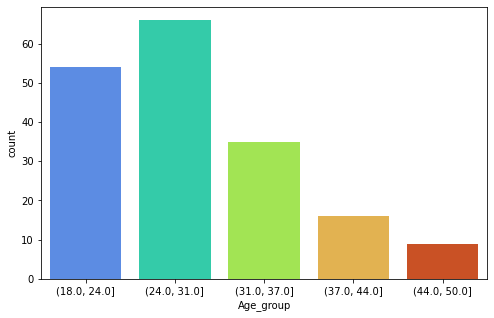

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age_group', palette='turbo')

In [12]:
df['Age'].agg(['mean', 'median', 'min', 'max'])

mean      28.788889
median    26.000000
min       18.000000
max       50.000000
Name: Age, dtype: float64

**Вывод:** продукция наиболее пользуется спросом у клиентов возрастной категории от 18 до 31 года. Медианный возраст покупателей равен 26.
Далее с повышением возраста спрос падает. Максимальный возраст покупателя равен 50.

Посмотрим, как пол влияет на выбор линейки

In [13]:
df.groupby(['Product', 'Gender']).agg(['count'])['Age']

count
Product Gender       
TM195   Female     40
        Male       40
TM498   Female     29
        Male       31
TM798   Female      7
        Male       33

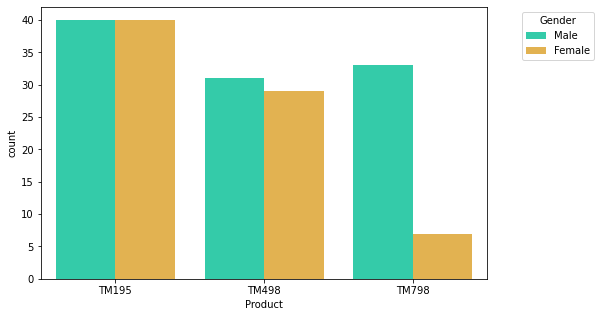

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Product', hue='Gender', palette='turbo')
plt.legend(bbox_to_anchor=(1.25, 1), title='Gender')

**Вывод:** Среди мужчин пользуются спросом все продукты, тогда как у женщин есть явные предпочтения в сторону моделей TM195, TM498. Модель TM798 женщины покупают редко.

Попробуем выяснить почему.

In [15]:
df.groupby('Gender')[['Usage', 'Fitness', 'Miles', 'Income']].agg(['mean', 'median'])

Usage          Fitness              Miles               Income  \
            mean median      mean median        mean median          mean   
Gender                                                                      
Female  3.184211      3  3.026316      3   90.013158     85  49828.907895   
Male    3.653846      4  3.519231      3  112.826923    100  56562.759615   

               
       median  
Gender         
Female  47754  
Male    52302

**Вывод:** Женщины менее замотивированы и уверенны в своих успехах, чем мужчины. Кроме того, доходы женщин ниже, чем у мужчин. 

Может модель TM798 дороже остальных или относится к более профессиональному классу? 

In [16]:
df.groupby('Product')['Income'].agg(['count', 'mean', 'median'])

,count,mean,median
Product,,,
TM195,80,46418.025,46617.0
TM498,60,48973.650,49459.5
TM798,40,75441.575,76568.5


<AxesSubplot:xlabel='Product', ylabel='Income'>

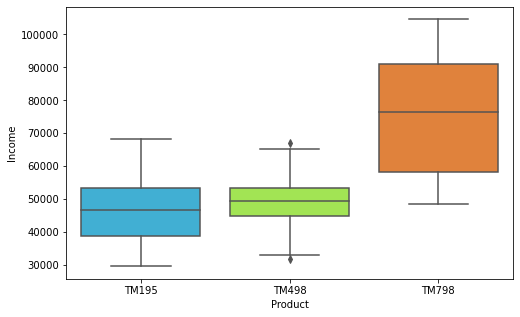

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Product', y='Income', palette='turbo')

<AxesSubplot:xlabel='Product', ylabel='Miles'>

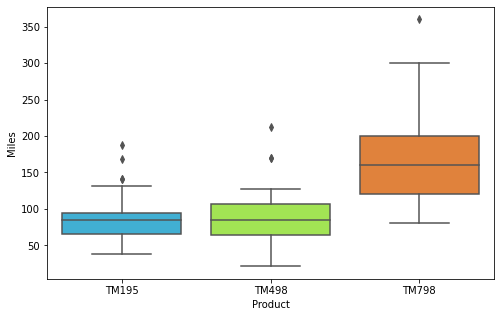

In [76]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Product', y='Miles', palette='turbo')

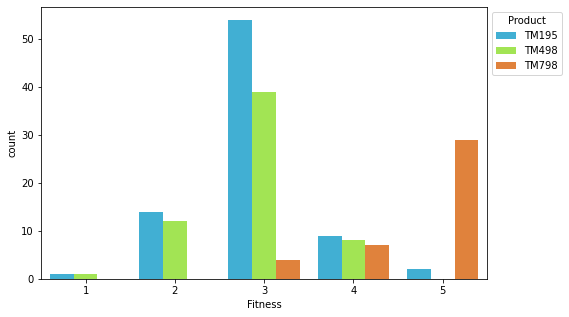

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Fitness', hue='Product', palette='turbo')
plt.legend(bbox_to_anchor=(1, 1), title='Product')

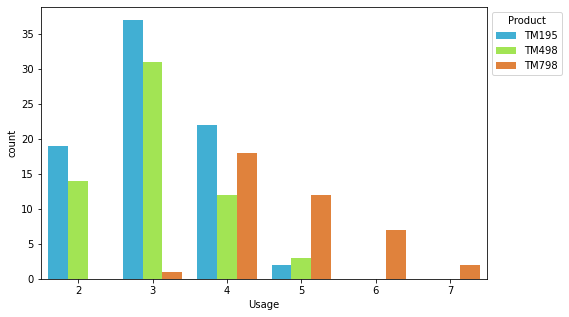

In [74]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Usage', hue='Product', palette='turbo')
plt.legend(bbox_to_anchor=(1, 1), title='Product')

**Вывод:** Можно смело сказать, что продукт TM798 находится в более высокой ценовой категории и ориентирован на более опытных спортсменов. TM798 приобретается людьми, которые планируют пользоваться дорожкой 4 и более раз в неделю. Кроме того, большинство пользователей TM798 оценивают свою физическую форму на 5.

Проверим, влияет ли семейное положение клиента на его выбор.

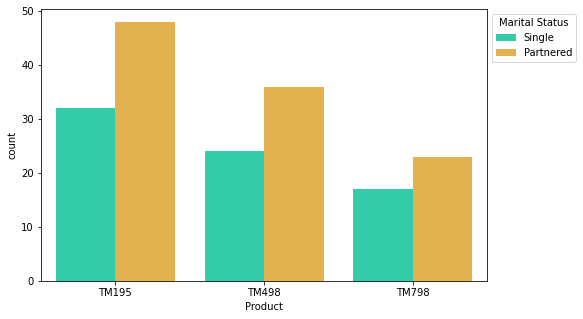

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Product', hue='MaritalStatus', palette='turbo')
plt.legend(bbox_to_anchor=(1.21, 1), title='Marital Status')

**Вывод:** Семейное положение само по себе явно не влияет на выбор клиента

Проверим влияние возраста

In [22]:
df.groupby(['Product']).agg(['count', 'mean', 'median'])['Age']

,count,mean,median
Product,,,
TM195,80,28.55,26
TM498,60,28.90,26
TM798,40,29.10,27


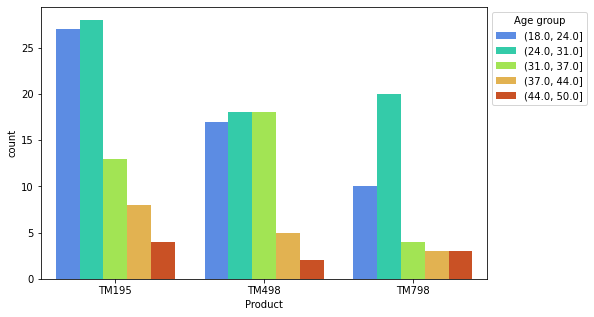

In [72]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Product', hue='Age_group', palette='turbo')
plt.legend(bbox_to_anchor=(1, 1), title='Age group')

**Вывод:** Сам по себе возраст незначительно влияет на выбор продукции, однако в разных возрастных категориях выбор продукта немного отличается. Если  количество покупателей продуктов TM195 и TM498 в категориях 18-24 и 24-31 почти одинаково, то количество покупателей TM798 в этих группах сильно отличается.

Выясним почему. Возможно, в категории 24-31 более мотивированные и опытные спортсмены, поэтому они чаще выбирают более дорогую линейку? Или же у них просто больше доход?

In [24]:
df.groupby('Age_group')[['Miles', 'Usage', 'Fitness', 'Income']].agg(['mean', 'median'])

Miles            Usage          Fitness         \
                    mean median      mean median      mean median   
Age_group                                                           
(18.0, 24.0]   95.425926   89.5  3.370370      3  3.222222      3   
(24.0, 31.0]  111.212121  100.0  3.651515      4  3.424242      3   
(31.0, 37.0]  102.828571   85.0  3.228571      3  3.142857      3   
(37.0, 44.0]  102.187500   85.0  3.500000      3  3.375000      3   
(44.0, 50.0]   94.222222   75.0  3.333333      3  3.555556      3   

                    Income         
                      mean median  
Age_group                          
(18.0, 24.0]  40947.851852  38658  
(24.0, 31.0]  57159.924242  51165  
(31.0, 37.0]  57713.342857  53439  
(37.0, 44.0]  63898.312500  59124  
(44.0, 50.0]  71493.888889  60261

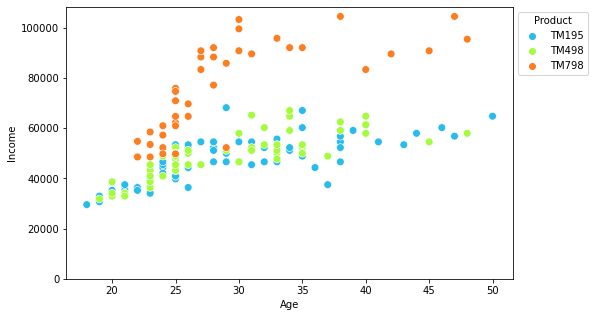

In [80]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Income', hue='Product', s=60, palette='turbo')
plt.ylim(0)
plt.legend(bbox_to_anchor=(1, 1), title='Product')

**Вывод:** Причиной того, что основными покупателями линейки TM798 (самой дорогой) являются люди (в основном, мужчины) из возрастной категории 24-31, являются бОльшая мотивированность и опытность в спорте. В категории 18-24 эта линейка не пользуется высоким спросом из-за низкого среднего дохода по сравнению с остальными категориями. Между моделями TM498 и TM798 явных различий по информации о покупателях не выявлено.

До этого момента между моделями TM498 и TM798 явных различий по информации о покупателях не выявлено. Рассмотрим различие моделей поподробнее.


In [26]:
df.groupby('Product').agg(['mean', 'median'])

Age         Education            Usage        Fitness         \
          mean median       mean median      mean median    mean median   
Product                                                                   
TM195    28.55     26  15.037500     16  3.087500      3  2.9625      3   
TM498    28.90     26  15.116667     16  3.066667      3  2.9000      3   
TM798    29.10     27  17.325000     18  4.775000      5  4.6250      5   

            Income                Miles         
              mean   median        mean median  
Product                                         
TM195    46418.025  46617.0   82.787500     85  
TM498    48973.650  49459.5   87.933333     85  
TM798    75441.575  76568.5  166.900000    160

**Вывод:** Средний заработок и ожидаемое количество пройденных миль покупателей TM498 незначительно выше, чем у покупателей TM195. Значительных отличий между покупателями моделей TM195, TM498 нет. Их покупатели в среднем оценивают свою формун на 3 и собираются пользоваться дорожкой 3 раза в неделю. Пользователи более дорогой модели TM798 планируют проходить растоянии почти в 2 раза большее, чем пользователи TM195, TM498. Кроме того, доходы и уровни образования пользователей TM798 значительно выше, чем у покупателей других моделей.

Интересно посмотреть, как семейное положение влияет на мотивированность в спорте

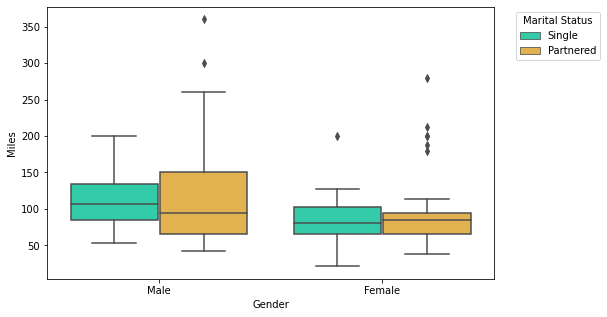

In [81]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='Miles', x='Gender', hue='MaritalStatus', palette='turbo')
plt.legend(bbox_to_anchor=(1.25, 1), title='Marital Status')

In [28]:
df.groupby(['Gender', 'MaritalStatus'])['Miles'].agg(['mean', 'median'])

mean  median
Gender MaritalStatus                    
Female Partnered       93.326087      85
       Single          84.933333      80
Male   Partnered      112.557377      95
       Single         113.209302     106

**Вывод:** Интересно получилось, что самым высоким показателем мотивированности обладают одинокие мужчины, тогда как наличие партнера ее уменьшает. У женщин же, наоборот, наличие партнера еще больше мотивирует заниматься спортом. При этом спортсмены, обладающие наибольшей мотивированностью по всей выборке, состоят в отношениях.

Как взаимосвязаны между собой возраст, образование и доход?

<AxesSubplot:>

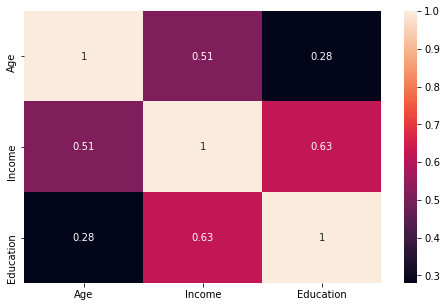

In [84]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Age', 'Income', 'Education']].corr(), annot=True)

(0.0, 51.6)

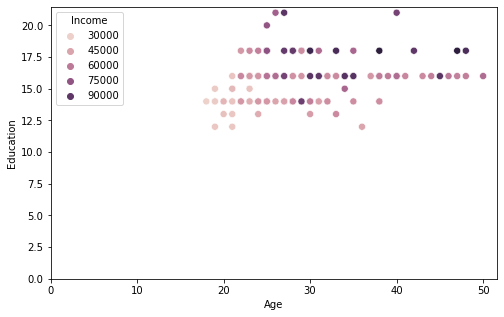

In [88]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Education', data=df, s=50, hue='Income')
plt.ylim(0)
plt.xlim(0)

**Вывод:** Установлена умеренная положительная линейная связь между возрастом и доходом и между образованием и доходом, что ожидаемо. Между возрастом и образованием слабая положительная линейная связь.

Есть ли связь между успехами в спорте и доходом, образованием?

<AxesSubplot:>

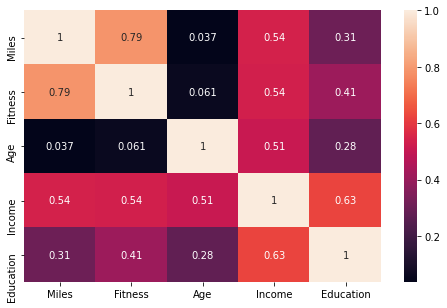

In [42]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Miles', 'Fitness', 'Age', 'Income', 'Education']].corr(), annot=True)

<AxesSubplot:xlabel='Age', ylabel='Miles'>

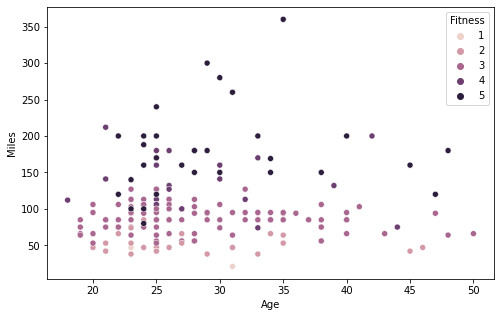

In [87]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Miles', hue='Fitness')

**Вывод:** Между успехами в спорте и доходами установлена прямая положительная линейная связь. Клиенты с более продолжительнмым образованием в среднем лучше оценивают свою физическую форму. При этом мотивированность и успехи в спорте не зависят от возраста покупателей.

________

**ВЫВОДЫ**
* Самой популярной за последние 3 месяца является модель беговых дорожек TM195, а менее популярной - TM798, которая относится к более профессиональному и дорогому классу тренажеров.
* Среди покупателей преобладают мужчины, состоящие в отношениях.
* Среди покупателей преобладает возрастная категория от 18 до 31 года. Далее с повышением возраста величина спроса падает и равняется нулю среди покупателей старше 50 лет.
* Модели TM195, TM498 приобретаются и мужчинами, и женщинами почти одинаково. При этом явных различий в мотивированности, профессиональности в спорте покупателей этих моделей не выявлено. Их приобретают люди, в среднем оценивающие свою физическую форму на 3 и собирающиеся тренироваться в среднем 3 раза в неделю.
* Модель TM798 приобретается высоко замотивированными и более опытными людьми, которые в основном оценивают свою физическую форму на 5 и собираются тренироваться в среднем 5 раз в неделю. Наиболее популярна эта модель среди мужчин возрастной категории 24-31. Женщины же редко выбирают эту модель.
* Женщины менее замотивированы и уверены в своих успехах в спорте, поэтому они в основном выбирают более простые и дешевые модели TM195, TM498. Кроме того, доходы женщин в среднем ниже доходов мужчин по данной выборке.
* Доходы и уровни образования пользователей дорогой модели TM798 значительно выше, чем у покупателей других моделей. При это
* У мужчин наличие партнера понижает мотивированность в спорте, а у женщин, наоборот, повышает.
* На доход клиентов умеренно прямо влияет их возраст и образование, при этом между возрастом и образованием слабая связь.
* Успехи в спорте не зависят от возраста покупателей дорожек. При этом клиенты с более продолжительным образованием и высокими доходами в среднем оценивают свою физическую форму лучше.